In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
highestgrosser = pd.read_csv('../HighestGrossers.csv')
ticketsales2 = pd.read_csv('../TicketSales_cleaned.csv')

In [3]:
highestgrosser
highestgrosser['TICKETS SOLD'] = highestgrosser['TICKETS SOLD'].replace(',','', regex=True)

In [4]:
ticketsales2

,Unnamed: 0,YEAR,TICKETS SOLD,TOTAL BOX OFFICE,TOTAL INFLATION ADJUSTED BOX OFFICE,AVERAGE TICKET PRICE,Total Box Office Numeric
0,0,2021,423774881,3881777912,3881777912,9.16,3881777912
1,1,2020,223638958,2048534616,2048534616,9.16,2048534616
2,2,2019,1228541629,11253443955,11253444050,9.16,11253443955
3,3,2018,1311536128,11948096650,12013670952,9.11,11948096650
4,4,2017,1225639761,10993991460,11226860216,8.97,10993991460
5,5,2016,1302556378,11267115924,11931416424,8.65,11267115924
6,6,2015,1323356776,11155900636,12121948075,8.43,11155900636
7,7,2014,1257402920,10272985008,11517810744,8.17,10272985008
8,8,2013,1339168926,10887446341,12266787382,8.13,10887446341
9,9,2012,1380921942,10992141616,12649244986,7.96,10992141616


In [5]:
highestgrosser.sort_values('YEAR', ascending=False)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,YEAR,MOVIE,GENRE,MPAA RATING,DISTRIBUTOR,TOTAL FOR YEAR,TOTAL IN 2019 DOLLARS,TICKETS SOLD
26,26,26,26,2021,Shang-Chi and the Legend of the Ten Rings,Action,PG-13,Walt Disney,"$224,226,704","$224,226,704",24478897
25,25,25,25,2020,Bad Boys For Life,Action,R,Sony Pictures,"$204,417,855","$204,417,848",22316359
24,24,24,24,2019,Avengers: Endgame,Action,PG-13,Walt Disney,"$858,373,000","$858,373,002",93708843
23,23,23,23,2018,Black Panther,Action,PG-13,Walt Disney,"$700,059,566","$703,901,821",76845177
22,22,22,22,2017,Star Wars Ep. VIII: The Last Jedi,Action,PG-13,Walt Disney,"$517,218,368","$528,173,936",57660910
21,21,21,21,2016,Finding Dory,Action,PG,Walt Disney,"$486,295,561","$514,967,322",56219140
20,20,20,20,2015,Star Wars Ep. VII: The Force Awakens,Action,PG-13,Walt Disney,"$742,208,942","$806,480,887",88043765
19,19,19,19,2014,Guardians of the Galaxy,Adventure,PG-13,Walt Disney,"$333,055,258","$373,413,235",40765637
18,18,18,18,2013,Iron Man 3,Adventure,PG-13,Walt Disney,"$408,992,272","$460,808,016",50306552
17,17,17,17,2012,The Avengers,Adventure,PG-13,Walt Disney,"$623,357,910","$717,331,462",78311295


In [6]:
# #Gather genre from imdb

highestgrosser.loc[24, 'GENRE'] = 'Action'
highestgrosser.loc[25, 'GENRE'] = 'Action'
highestgrosser.loc[26, 'GENRE'] = 'Action'

In [7]:
highestgrosser.to_csv('../HighestGrossers.csv')

In [8]:
#combine ticket sales and highest grossingtables
HighestGrossingplussales = highestgrosser.merge(ticketsales2, how='inner', on='YEAR')
HighestGrossingplussales.head()

,Unnamed: 0_x,Unnamed: 0.1,Unnamed: 0.1.1,YEAR,MOVIE,GENRE,MPAA RATING,DISTRIBUTOR,TOTAL FOR YEAR,TOTAL IN 2019 DOLLARS,TICKETS SOLD_x,Unnamed: 0_y,TICKETS SOLD_y,TOTAL BOX OFFICE,TOTAL INFLATION ADJUSTED BOX OFFICE,AVERAGE TICKET PRICE,Total Box Office Numeric
0,0,0,0,1995,Batman Forever,Drama,PG-13,Warner Bros.,"$184,031,112","$387,522,978",42306002,26,1221705907,5314421390,11190826105,4.35,5314421390
1,1,1,1,1996,Independence Day,Adventure,PG-13,20th Century Fox,"$306,169,255","$634,504,608",69269062,25,1305221290,5769078886,11955781912,4.42,5769078886
2,2,2,2,1997,Men in Black,Adventure,PG-13,Sony Pictures,"$250,650,052","$500,207,943",54607854,24,1357349648,6230235770,12433322785,4.59,6230235770
3,3,3,3,1998,Titanic,Adventure,PG-13,Paramount Pictures,"$443,319,081","$865,842,808",94524324,23,1443832471,6771575283,13225505439,4.69,6771575283
4,4,4,4,1999,Star Wars Ep. I: The Phantom Menace,Adventure,PG,20th Century Fox,"$430,443,350","$776,153,749",84732942,22,1444664086,7338894852,13233123027,5.08,7338894852


In [9]:
HighestGrossingplussales = HighestGrossingplussales.drop("Unnamed: 0_y", axis=1)

In [10]:
HighestGrossingplussales.columns

Index(['Unnamed: 0_x', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'YEAR', 'MOVIE',
       'GENRE', 'MPAA RATING', 'DISTRIBUTOR', 'TOTAL FOR YEAR',
       'TOTAL IN 2019 DOLLARS', 'TICKETS SOLD_x', 'TICKETS SOLD_y',
       'TOTAL BOX OFFICE', 'TOTAL INFLATION ADJUSTED BOX OFFICE',
       'AVERAGE TICKET PRICE', 'Total Box Office Numeric'],
      dtype='object')

In [26]:
HighestGrossingplussales.rename(columns = {'TICKETS SOLD_x': 'Tickets movie sold', 'TICKETS SOLD_y': 'Total tickets sold this year'}, inplace=True)

In [28]:
HighestGrossingplussales = HighestGrossingplussales.drop("Unnamed: 0_x", axis=1)
HighestGrossingplussales = HighestGrossingplussales.drop("Unnamed: 0.1", axis=1)
HighestGrossingplussales = HighestGrossingplussales.drop("Unnamed: 0.1.1", axis=1)

In [32]:
HighestGrossingplussales.head()

,YEAR,MOVIE,GENRE,MPAA RATING,DISTRIBUTOR,TOTAL FOR YEAR,TOTAL IN 2019 DOLLARS,Tickets movie sold,Total tickets sold this year,TOTAL BOX OFFICE,TOTAL INFLATION ADJUSTED BOX OFFICE,AVERAGE TICKET PRICE,Total Box Office Numeric
0,1995,Batman Forever,Drama,PG-13,Warner Bros.,"$184,031,112","$387,522,978",42306002,1221705907,5314421390,11190826105,4.35,5314421390
1,1996,Independence Day,Adventure,PG-13,20th Century Fox,"$306,169,255","$634,504,608",69269062,1305221290,5769078886,11955781912,4.42,5769078886
2,1997,Men in Black,Adventure,PG-13,Sony Pictures,"$250,650,052","$500,207,943",54607854,1357349648,6230235770,12433322785,4.59,6230235770
3,1998,Titanic,Adventure,PG-13,Paramount Pictures,"$443,319,081","$865,842,808",94524324,1443832471,6771575283,13225505439,4.69,6771575283
4,1999,Star Wars Ep. I: The Phantom Menace,Adventure,PG,20th Century Fox,"$430,443,350","$776,153,749",84732942,1444664086,7338894852,13233123027,5.08,7338894852


In [13]:
ticketsales2['TICKETS SOLD'] = ticketsales2['TICKETS SOLD'].replace(',','', regex=True)

In [14]:
HighestGrossingplussales

,Unnamed: 0_x,Unnamed: 0.1,Unnamed: 0.1.1,YEAR,MOVIE,GENRE,MPAA RATING,DISTRIBUTOR,TOTAL FOR YEAR,TOTAL IN 2019 DOLLARS,TICKETS SOLD_x,TICKETS SOLD_y,TOTAL BOX OFFICE,TOTAL INFLATION ADJUSTED BOX OFFICE,AVERAGE TICKET PRICE,Total Box Office Numeric
0,0,0,0,1995,Batman Forever,Drama,PG-13,Warner Bros.,"$184,031,112","$387,522,978",42306002,1221705907,5314421390,11190826105,4.35,5314421390
1,1,1,1,1996,Independence Day,Adventure,PG-13,20th Century Fox,"$306,169,255","$634,504,608",69269062,1305221290,5769078886,11955781912,4.42,5769078886
2,2,2,2,1997,Men in Black,Adventure,PG-13,Sony Pictures,"$250,650,052","$500,207,943",54607854,1357349648,6230235770,12433322785,4.59,6230235770
3,3,3,3,1998,Titanic,Adventure,PG-13,Paramount Pictures,"$443,319,081","$865,842,808",94524324,1443832471,6771575283,13225505439,4.69,6771575283
4,4,4,4,1999,Star Wars Ep. I: The Phantom Menace,Adventure,PG,20th Century Fox,"$430,443,350","$776,153,749",84732942,1444664086,7338894852,13233123027,5.08,7338894852
5,5,5,5,2000,How the Grinch Stole Christmas,Adventure,PG,Universal,"$253,367,455","$430,583,644",47006948,1397460079,7532311479,12800734319,5.39,7532311479
6,6,6,6,2001,Harry Potter and the Sorcerer’s Stone,Adventure,PG,Warner Bros.,"$300,404,434","$486,166,890",53074988,1465874205,8296849636,13427407722,5.66,8296849636
7,7,7,7,2002,Spider-Man,Adventure,PG-13,Sony Pictures,"$403,706,375","$636,480,273",69484746,1575756527,9155147215,14433929789,5.81,9155147215
8,8,8,8,2003,Finding Nemo,Adventure,G,Walt Disney,"$339,714,367","$516,050,346",56337374,1524589620,9193277289,13965240914,6.03,9193277289
9,9,9,9,2004,Shrek 2,Adventure,PG,Dreamworks SKG,"$441,226,247","$650,826,473",71050925,1495651298,9287996519,13700165883,6.21,9287996519


In [15]:
HighestGrossingplussales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27 entries, 0 to 26
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Unnamed: 0_x                         27 non-null     int64  
 1   Unnamed: 0.1                         27 non-null     int64  
 2   Unnamed: 0.1.1                       27 non-null     int64  
 3   YEAR                                 27 non-null     int64  
 4   MOVIE                                27 non-null     object 
 5   GENRE                                27 non-null     object 
 6   MPAA RATING                          27 non-null     object 
 7   DISTRIBUTOR                          27 non-null     object 
 8   TOTAL FOR YEAR                       27 non-null     object 
 9   TOTAL IN 2019 DOLLARS                27 non-null     object 
 10  TICKETS SOLD_x                       27 non-null     int64  
 11  TICKETS SOLD_y                    

In [16]:
HighestGrossingplussales['GENRE'].value_counts()

Adventure    14
Action       12
Drama         1
Name: GENRE, dtype: int64

In [17]:
HighestGrossingplussales['MPAA RATING'].value_counts()

PG-13    19
PG        5
G         2
R         1
Name: MPAA RATING, dtype: int64

In [18]:
HighestGrossingplussales['DISTRIBUTOR'].value_counts()

Walt Disney           12
Warner Bros.           4
Sony Pictures          4
20th Century Fox       3
Paramount Pictures     2
Universal              1
Dreamworks SKG         1
Name: DISTRIBUTOR, dtype: int64

In [19]:
HighestGrossingplussales['TICKETS SOLD_x'] = HighestGrossingplussales['TICKETS SOLD_x'].replace(',','', regex=True)
HighestGrossingplussales['TICKETS SOLD_x'] = HighestGrossingplussales['TICKETS SOLD_x'].astype('int64')

In [20]:
HighestGrossingplussales.head()

,Unnamed: 0_x,Unnamed: 0.1,Unnamed: 0.1.1,YEAR,MOVIE,GENRE,MPAA RATING,DISTRIBUTOR,TOTAL FOR YEAR,TOTAL IN 2019 DOLLARS,TICKETS SOLD_x,TICKETS SOLD_y,TOTAL BOX OFFICE,TOTAL INFLATION ADJUSTED BOX OFFICE,AVERAGE TICKET PRICE,Total Box Office Numeric
0,0,0,0,1995,Batman Forever,Drama,PG-13,Warner Bros.,"$184,031,112","$387,522,978",42306002,1221705907,5314421390,11190826105,4.35,5314421390
1,1,1,1,1996,Independence Day,Adventure,PG-13,20th Century Fox,"$306,169,255","$634,504,608",69269062,1305221290,5769078886,11955781912,4.42,5769078886
2,2,2,2,1997,Men in Black,Adventure,PG-13,Sony Pictures,"$250,650,052","$500,207,943",54607854,1357349648,6230235770,12433322785,4.59,6230235770
3,3,3,3,1998,Titanic,Adventure,PG-13,Paramount Pictures,"$443,319,081","$865,842,808",94524324,1443832471,6771575283,13225505439,4.69,6771575283
4,4,4,4,1999,Star Wars Ep. I: The Phantom Menace,Adventure,PG,20th Century Fox,"$430,443,350","$776,153,749",84732942,1444664086,7338894852,13233123027,5.08,7338894852


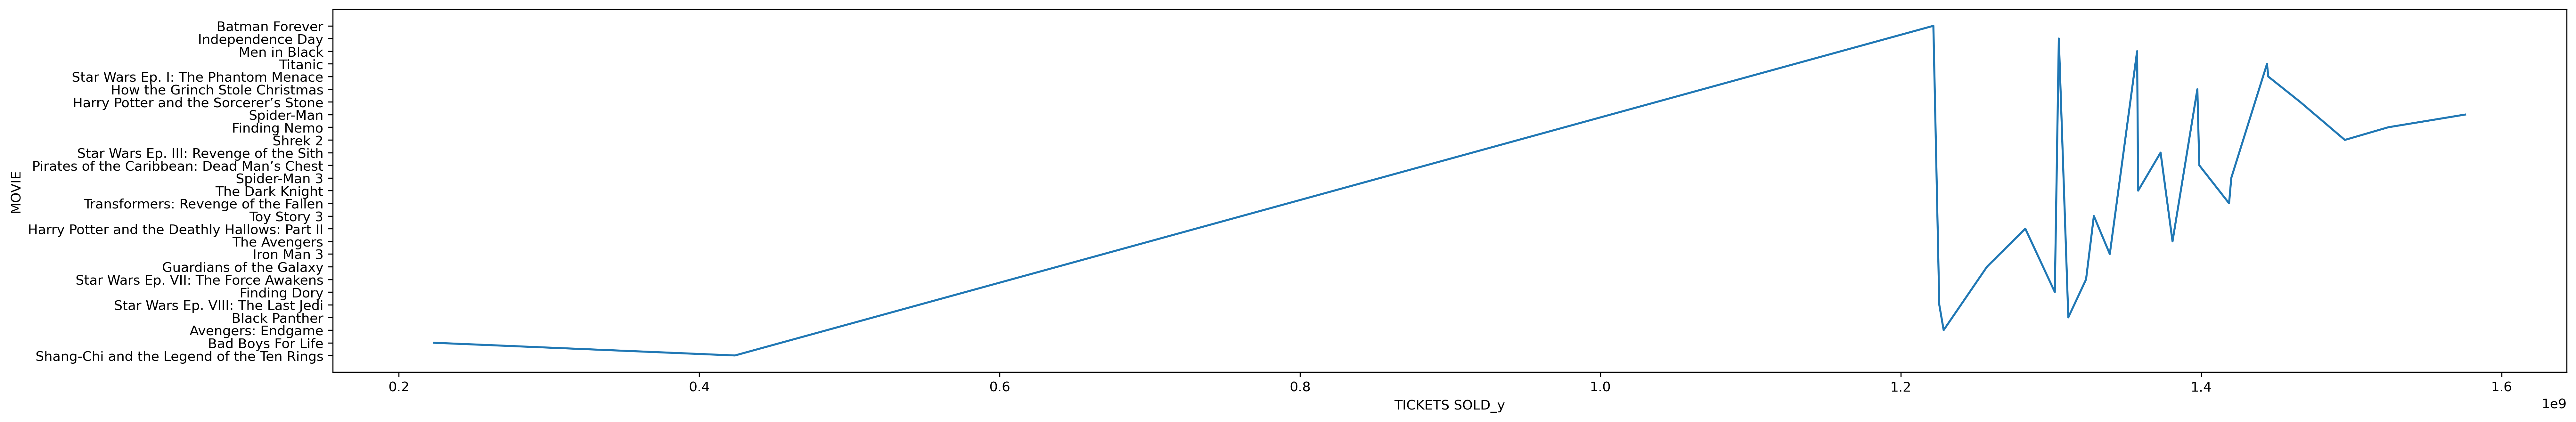

In [21]:
plt.figure(figsize=(30,5),dpi=300)
sns.lineplot(data=HighestGrossingplussales, y='MOVIE', x='TICKETS SOLD_y')
# plt.xticks(rotation=45)
plt.show()

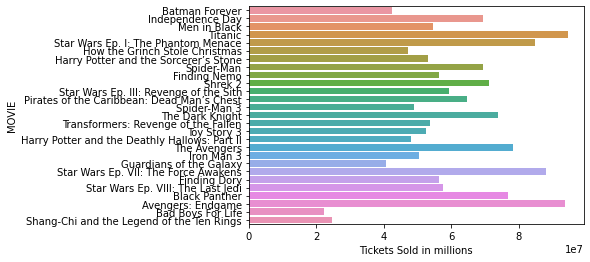

In [22]:
sns.barplot(data=HighestGrossingplussales, y='MOVIE', x='TICKETS SOLD_x')
plt.xlabel('Tickets Sold in millions')
plt.show()

In [23]:
HighestGrossingplussales[['YEAR','MOVIE','TOTAL FOR YEAR','TICKETS SOLD_x','AVERAGE TICKET PRICE']]

,YEAR,MOVIE,TOTAL FOR YEAR,TICKETS SOLD_x,AVERAGE TICKET PRICE
0,1995,Batman Forever,"$184,031,112",42306002,4.35
1,1996,Independence Day,"$306,169,255",69269062,4.42
2,1997,Men in Black,"$250,650,052",54607854,4.59
3,1998,Titanic,"$443,319,081",94524324,4.69
4,1999,Star Wars Ep. I: The Phantom Menace,"$430,443,350",84732942,5.08
5,2000,How the Grinch Stole Christmas,"$253,367,455",47006948,5.39
6,2001,Harry Potter and the Sorcerer’s Stone,"$300,404,434",53074988,5.66
7,2002,Spider-Man,"$403,706,375",69484746,5.81
8,2003,Finding Nemo,"$339,714,367",56337374,6.03
9,2004,Shrek 2,"$441,226,247",71050925,6.21


In [24]:
HighestGrossingplussales[['YEAR','MOVIE','DISTRIBUTOR','TOTAL FOR YEAR','TICKETS SOLD_x']].sort_values('DISTRIBUTOR')

,YEAR,MOVIE,DISTRIBUTOR,TOTAL FOR YEAR,TICKETS SOLD_x
1,1996,Independence Day,20th Century Fox,"$306,169,255",69269062
4,1999,Star Wars Ep. I: The Phantom Menace,20th Century Fox,"$430,443,350",84732942
10,2005,Star Wars Ep. III: Revenge of the Sith,20th Century Fox,"$380,270,577",59324582
9,2004,Shrek 2,Dreamworks SKG,"$441,226,247",71050925
3,1998,Titanic,Paramount Pictures,"$443,319,081",94524324
14,2009,Transformers: Revenge of the Fallen,Paramount Pictures,"$402,111,870",53614916
2,1997,Men in Black,Sony Pictures,"$250,650,052",54607854
7,2002,Spider-Man,Sony Pictures,"$403,706,375",69484746
12,2007,Spider-Man 3,Sony Pictures,"$336,530,303",48914288
25,2020,Bad Boys For Life,Sony Pictures,"$204,417,855",22316359


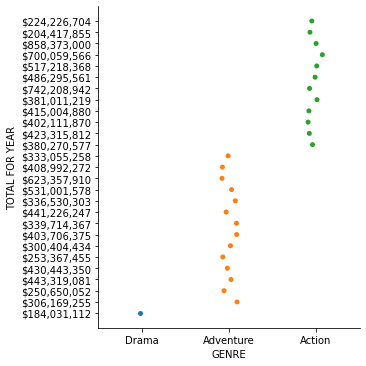

In [25]:
pieplot = HighestGrossingplussales[['DISTRIBUTOR', 'TOTAL FOR YEAR']]
sns.catplot(data=HighestGrossingplussales, x='GENRE', y='TOTAL FOR YEAR')